# Hourly Echo

This notebook downloads Quotes data and create a database.

---

## Quotes Dataset

We use Quotes Dataset from [ShivaliGoel/Quotes-500K](https://github.com/ShivaliGoel/Quotes-500K)


### Download Dataset

In [1]:
import gdown

In [2]:
# !gdown --fuzzy https://drive.google.com/file/d/1dPCpNIUxqhe2GccLF0tmAapnwgA5Olr2/view

### Load csv data

In [3]:
quotes = open('quotes_dataset.csv').read().splitlines()

In [4]:
print("Total quotes in dataset:", len(quotes))

Total quotes in dataset: 499996


In [5]:
print(quotes[0])

"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.",Marilyn Monroe,"attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


---

## Clean Data

This Dataset doesn't have cleaned data. So, we have to clean it and extract data as per our need

In [6]:
quote_list = []

for quote_data in quotes:
    temp_quote_data = quote_data
    if quote_data.strip() != '':
        try:
            if quote_data.startswith('"'):
                quote = quote_data.split('",')[0].replace('"', '')
                quote_data = quote_data.split('",')[1]
            elif quote_data.startswith("'"):
                quote = quote_data.split("',")[0].replace("'", '')
                quote_data = quote_data.split("',")[1]
            else:
                quote = quote_data.split(',')[0]
                quote_data = quote_data.split(',')[1]
        except:
            # print("Error => ", temp_quote_data)
            continue

        try:
            if quote_data.startswith('"'):
                author = quote_data.split('",')[0].replace('"', '')
            elif quote_data.startswith("'"):
                author = quote_data.split("',")[0].replace("'", '')
            else:
                author = quote_data.split(',')[0]
            author = author.split(",")[0].strip()
        except:
            # print("Error => ", temp_quote_data)
            continue

        if quote.strip() != '' and quote.strip().endswith(".") and author.strip() != '':
            quote_list.append([quote, author])

In [7]:
print("Total Quotes after cleaning:", len(quote_list))

Total Quotes after cleaning: 418368


In [8]:
print(quote_list[0])

["I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.", 'Marilyn Monroe']


---

## Select Quotes

In [9]:
import matplotlib.pyplot as plt

(array([2.50977e+05, 1.04897e+05, 3.14640e+04, 1.35760e+04, 6.89500e+03,
        3.79400e+03, 2.31300e+03, 1.38700e+03, 8.99000e+02, 5.53000e+02,
        3.79000e+02, 2.53000e+02, 2.21000e+02, 1.55000e+02, 1.24000e+02,
        9.70000e+01, 7.50000e+01, 6.50000e+01, 5.50000e+01, 4.70000e+01,
        3.80000e+01, 3.30000e+01, 2.50000e+01, 2.20000e+01, 2.40000e+01]),
 array([   4.  ,  163.28,  322.56,  481.84,  641.12,  800.4 ,  959.68,
        1118.96, 1278.24, 1437.52, 1596.8 , 1756.08, 1915.36, 2074.64,
        2233.92, 2393.2 , 2552.48, 2711.76, 2871.04, 3030.32, 3189.6 ,
        3348.88, 3508.16, 3667.44, 3826.72, 3986.  ]),
 <BarContainer object of 25 artists>)

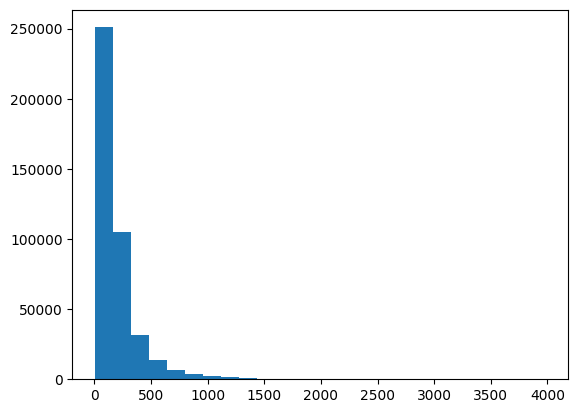

In [10]:
plt.hist([len(q[0]) for q in quote_list], bins=25)

In this project, we will use Quotes with length smaller than 80 characters.

---

## Create Database

In [11]:
!mkdir -p db

In [12]:
import sqlite3

conn = sqlite3.connect('db/quotes.db')
cur = conn.cursor()

cur.execute(
    """CREATE TABLE IF NOT EXISTS quotes (
        quote TEXT UNIQUE, 
        author TEXT,
        tweeted INTEGER DEFAULT 0
    )""")
conn.commit()

### Insert Quotes into Database

In [13]:
for q in quote_list:
    if len(q[0]) < 80:
        cur.execute(
            "INSERT OR IGNORE INTO quotes (quote, author) VALUES (?, ?)", (q[0], q[1]))
conn.commit()

In [14]:
cur.execute("SELECT COUNT(*) FROM quotes")
print("Total quotes in database:", cur.fetchone()[0])
conn.close()

Total quotes in database: 107099


---

This notebook saves 107099 Quotes in the database.

If we tweet 1 quote per hour, it will take 107099/(24*365)= 12.225913242 years to tweet all quotes.

---

<p align="center">Made with 💖 by Codinasion</p>

---